In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import calendar

In [2]:
# Getting the dataset from other folder
df = pd.read_csv(r'C:\Users\Asdar\Desktop\My_Phyton\Dataset\Total Business Inventories and Sales Data\TOTBUSIMNSA.csv')
print(df.shape)
df.head()

(333, 4)


,realtime_start,value,date,realtime_end
0,2019-12-06,802948,1992-01-01,2019-12-06
1,2019-12-06,809329,1992-02-01,2019-12-06
2,2019-12-06,813301,1992-03-01,2019-12-06
3,2019-12-06,819247,1992-04-01,2019-12-06
4,2019-12-06,815688,1992-05-01,2019-12-06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   realtime_start  333 non-null    object
 1   value           333 non-null    int64 
 2   date            333 non-null    object
 3   realtime_end    333 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.6+ KB


In [4]:
# Investigate all the elements whithin each Feature
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature realtime_start :1 -- ['2019-12-06']
The number of values for feature value :333
The number of values for feature date :333
The number of values for feature realtime_end :1 -- ['2019-12-06']


In [5]:
sns.set(rc={'figure.figsize':(12,10)})

Text(0.5, 1.0, 'The Distribution of value')

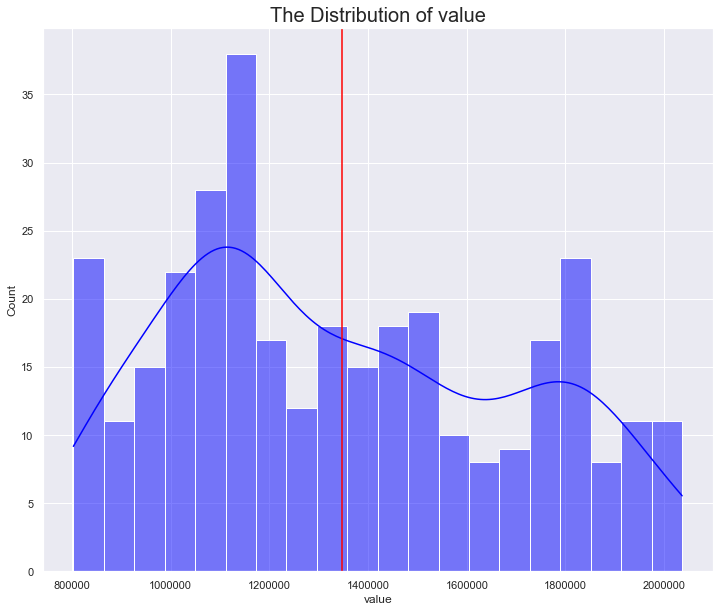

In [14]:
# Investigating the distribution of Total Net Sales
sns.histplot(data=df, x="value", kde=True, color = 'blue', bins=20) #log_scale=True

# Calculating the mean
mean = df["value"].mean()
plt.axvline(mean, 0,1, color = 'red')
plt.ticklabel_format(style='plain', axis='x')
plt.title('The Distribution of value', size =20)

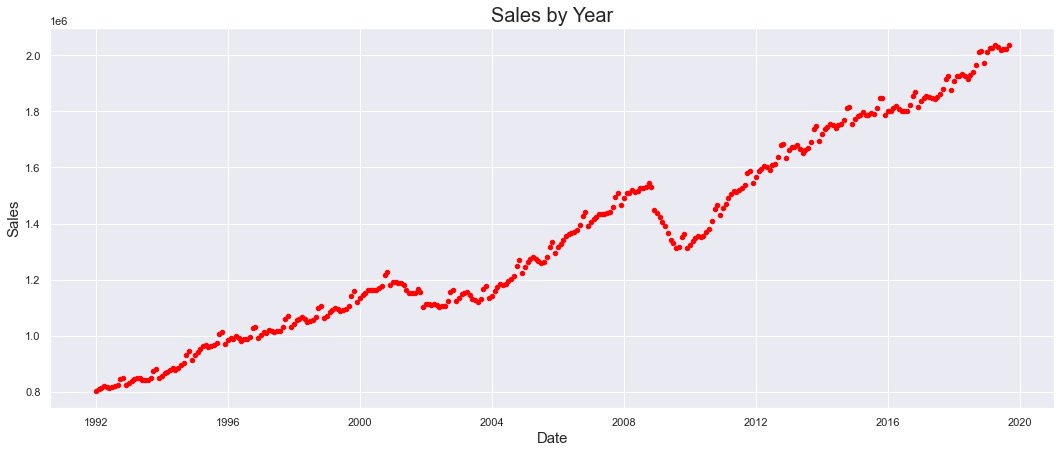

In [15]:
df1 = df.copy()
df1['date'] =  pd.to_datetime(df1['date'])
fig = df1.plot.scatter(x = 'date', y = 'value', figsize=(18, 7), color='red').figure
plt.title('Sales by Year', size =20)
plt.xlabel('Date', size =15)
plt.ylabel('Sales', size =15)
plt.show()

In [16]:
df2 = df.copy()
df2['date'] =  pd.to_datetime(df2['date'])
x = np.arange(df2['date'].size)
fit = np.polyfit(x, df2['value'], deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))

Slope : 3500.5123136988805
Intercept : 766817.5685385978


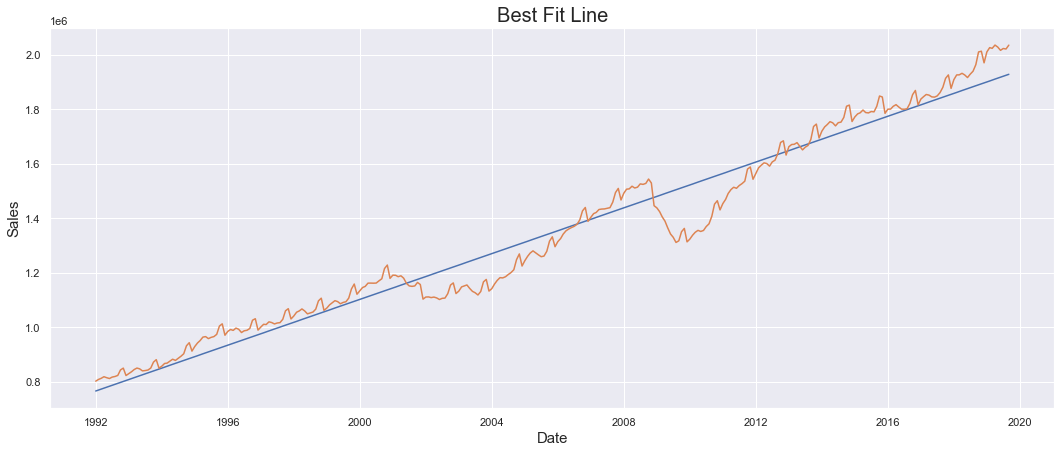

In [17]:
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)
plt.figure(figsize = (18, 7))
plt.plot(df2['date'], fit_function(x))
plt.plot(df2['date'], df['value'])
plt.title('Best Fit Line', size =20)
plt.xlabel('Date', size =15)
plt.ylabel('Sales', size =15)
plt.show()

In [18]:
df3 = df.copy()
df3 = df3.set_index('date')
df3['Year'] = pd.DatetimeIndex(df3.index).year
df3

,realtime_start,value,realtime_end,Year
date,,,,
1992-01-01,2019-12-06,802948,2019-12-06,1992
1992-02-01,2019-12-06,809329,2019-12-06,1992
1992-03-01,2019-12-06,813301,2019-12-06,1992
1992-04-01,2019-12-06,819247,2019-12-06,1992
1992-05-01,2019-12-06,815688,2019-12-06,1992
...,...,...,...,...
2019-05-01,2019-12-06,2029098,2019-12-06,2019
2019-06-01,2019-12-06,2016994,2019-12-06,2019
2019-07-01,2019-12-06,2023696,2019-12-06,2019


In [19]:
# find the sum of value for each year
df1_bar = df3.groupby(['Year'])['value'].mean()

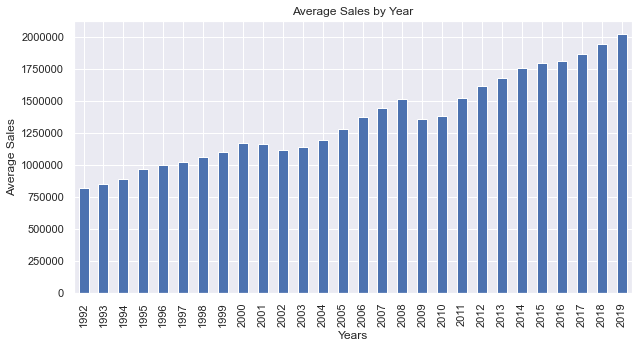

In [20]:
df1_bar.plot(kind= 'bar', figsize = (10,5))
plt.title('Average Sales by Year')
plt.xlabel('Years')
plt.ylabel('Average Sales')
plt.ticklabel_format(style='plain', axis='y')

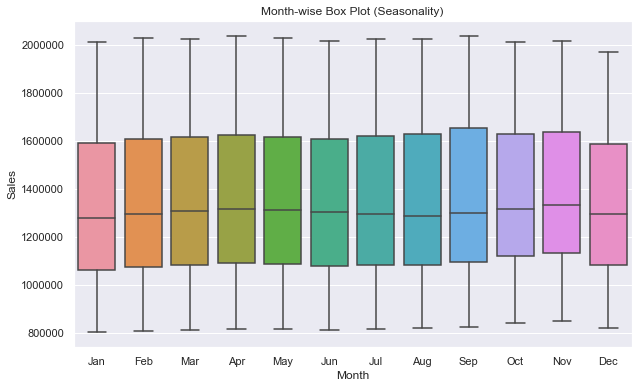

In [21]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['Month'] = pd.DatetimeIndex(df_box["date"]).month

sort_order = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df_box['Month'] = df_box['Month'].apply(lambda x: calendar.month_abbr[x])
df_box.index = pd.CategoricalIndex(df_box['Month'], categories=sort_order, ordered=True)
df_box = df_box.sort_index().reset_index(drop=True)
plt.figure(figsize=(10,6))
fig2 = sns.boxplot(x='Month', y='value', data=df_box)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Month-wise Box Plot (Seasonality)")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()